# **Face Detection and Recognition with Python**
---



In [1]:
# Boiler plate to mount in Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd "/content/gdrive/My Drive/Colab Notebooks"

/content/gdrive/My Drive/Colab Notebooks


In [4]:
!pwd

/content/gdrive/My Drive/Colab Notebooks


Install Face Recognition

In [5]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 105kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=10815832c9bb51d8f53a691572385bf626b672f192886da2ac130552fc03fe6b
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


**Imports**

In [ ]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
import cv2
import face_recognition
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
from scipy.spatial import distance
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from IPython.display import Image
import glob
import matplotlib.lines as mlines
from matplotlib.patches import Polygon
%matplotlib inline

# Hog Representation
Hog representation of sample image.

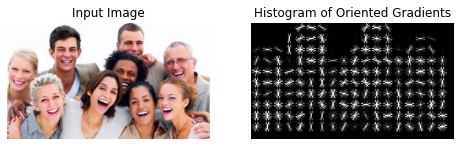

In [ ]:
image = cv2.imread('/content/test/people.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
feature_desc, hog_image = hog(image, orientations=8, pixels_per_cell=(16,16), cells_per_block=(1,1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input Image')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

Image Shape

In [ ]:
image.shape

(170, 297, 3)

# **Face Detection**

1
Face is located at (76,46) with Width=165 and Height=136


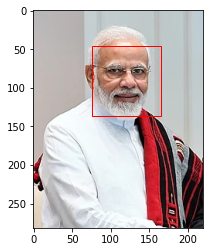

In [ ]:
def face_detector(filename):
  img = cv2.imread(f'/content//train/{filename}.jpg')
  image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  
  face_locations = face_recognition.face_locations(image)
  face_num = len(face_locations)
  print(face_num)

  plt.imshow(image)
  ax = plt.gca()

  for face_location in face_locations:
    top, right, bottom, left = face_location
    x, y, w, h = left, top, right, bottom
    print("Face is located at ({},{}) with Width={} and Height={}".format(x,y,w,h))
    rect = Rectangle((x,y), w-x, h-y, fill=False, color='red')
    ax.add_patch(rect)
  plt.show()
  return image[y:y+h,x:x+w]

i = face_detector('Namo')

# **Face Recognition**

['train/Shah_Rukh_Khan.jpg', 'train/donald-trump.jpg', 'train/Namo.jpg']
Face is located at (304,46) with Width=660 and Height=136


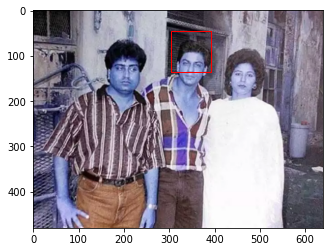

Found Shahrukh Khan in the photo!


In [ ]:
def face_recognizer(t_img):
  test_img = cv2.cvtColor(t_img, cv2.COLOR_BGR2RGB)
  plt.imshow(test_img)
  test_enc = face_recognition.face_encodings(test_img)
  folders = glob.glob('train/')
  known_img_list = []
  for folder in folders:
      for f in glob.glob(folder+'/*.jpg'):
          known_img_list.append(f)
  print(known_img_list)
  read_images = []
  known_enc = []
  for image in known_img_list:
      img = cv2.imread(image)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      read_images.append(img)
      enc = face_recognition.face_encodings(img)[0]
      known_enc.append(enc)
  for test in test_enc:
    results = []
    for train in known_enc:
      d = distance.euclidean(train, test)
      results.append(d)
    threshold = 0.6
    results = np.array(results) <= threshold

    name = "Unknown"
    flag=-1
    if results[0]:
      name = "Shahrukh Khan"
      flag = 0
    elif results[1]:
      name = "Donald Trump"
      flag = 1
    elif results[2]:
      name = "Narendra Modi"
      flag = 2
    if flag!=(-1):
        plt.imshow(t_img)
        ax = plt.gca()
        face_locations = face_recognition.face_locations(img)
        top, right, bottom, left = face_locations[0]
        x, y, w, h = 4*left, top, 4*right, bottom
        print("Face is located at ({},{}) with Width={} and Height={}".format(x,y,w,h))

        rect = Rectangle((x,y), (w-x)/4, h-y, fill=False, color='red')
        ax.add_patch(rect)
        plt.show()

  print(f"Found {name} in the photo!")

image = cv2.imread('/content/test/shahrukh.jpg')
face_recognizer(image)


# **Facial Feature Recognition & Manipulation**

In [ ]:
def facial_features(image):
  face_landmaks_list = face_recognition.face_landmarks(image)
  plt.imshow(image)
  ax = plt.gca()

  for face_landmarks in face_landmaks_list:
    left_eyebrow_pts = face_landmarks['left_eyebrow']
    pre_x, pre_y = left_eyebrow_pts[0]
    for (x,y) in left_eyebrow_pts[1:]:
      l = mlines.Line2D([pre_x, x], [pre_y, y], color="black")
      ax.add_line(l)
      pre_x,pre_y = x,y
    
    right_eyebrow_pts = face_landmarks['right_eyebrow']
    pre_x, pre_y = right_eyebrow_pts[0]
    for (x,y) in right_eyebrow_pts[1:]:
      l = mlines.Line2D([pre_x, x], [pre_y, y], color="black")
      ax.add_line(l)
      pre_x,pre_y = x,y

    top_lip_pts = face_landmarks['top_lip']
    pre_x, pre_y = top_lip_pts[0]
    for (x,y) in top_lip_pts[1:]:
      l = mlines.Line2D([pre_x, x], [pre_y, y], color="red")
      ax.add_line(l)
      pre_x,pre_y = x,y
    
    bottom_lip_pts = face_landmarks['bottom_lip']
    pre_x, pre_y = bottom_lip_pts[0]
    for (x,y) in bottom_lip_pts[1:]:
      l = mlines.Line2D([pre_x, x], [pre_y, y], color="red")
      ax.add_line(l)
      pre_x,pre_y = x,y

    chin_pts = face_landmarks['chin']
    pre_x, pre_y = chin_pts[0]
    for (x,y) in chin_pts[1:]:
      l = mlines.Line2D([pre_x, x], [pre_y, y], color="black")
      ax.add_line(l)
      pre_x,pre_y = x,y
    
    p = Polygon(face_landmarks['top_lip'], facecolor='lightsalmon', edgecolor='orangered')
    ax.add_patch(p)
    p = Polygon(face_landmarks['bottom_lip'], facecolor='lightsalmon', edgecolor='orangered')
    ax.add_patch(p)
  plt.show()

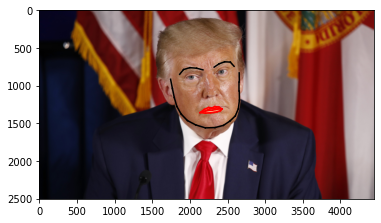

In [ ]:
#Face Landmarks for features
donald_img = cv2.imread("/content/train/donald-trump.jpg")
donald_img = cv2.cvtColor(donald_img, cv2.COLOR_BGR2RGB)
facial_features(donald_img)

# **Real Time Face Detection**
---



In [ ]:
def take_photo(filename, quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Enter your name:Aprameya


<IPython.core.display.Javascript object>

Saved to train/Aprameya.jpg


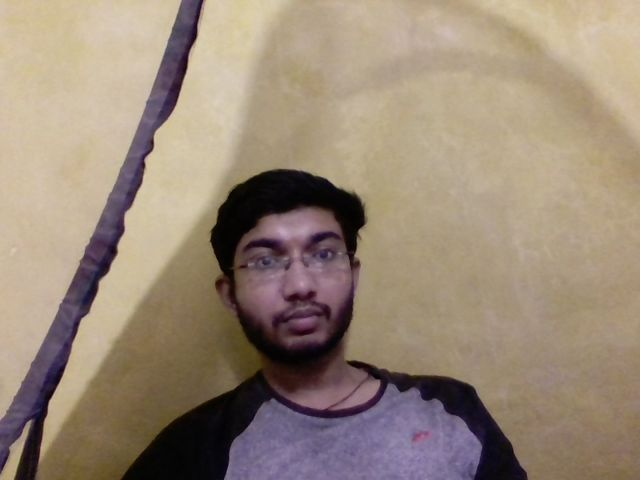

1
Face is located at (218,219) with Width=373 and Height=374


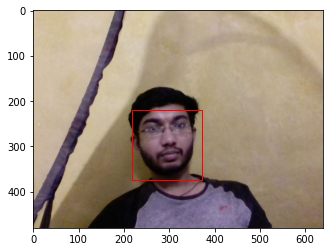

True

In [ ]:
s = input("Enter your name:")
name = f"train/{s}.jpg"
try:
  filename = take_photo(name)
  print('Saved to {}'.format(filename))
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  print(str(err))
i=face_detector(s)
cv2.imwrite(f'/content/test/{s}.jpg',i)

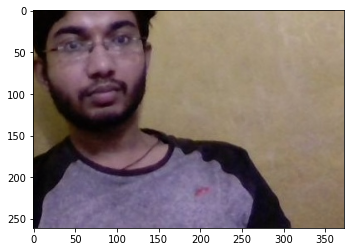

In [ ]:
a=cv2.imread(f'/content/test/{s}.jpg')
plt.imshow(a)